# CS4049 Assessment 2:

This assessment requires the use of a Taxi environment to train a model, using OpenAI. 

In [5]:
import gymnasium as gym  # For the environment.
import tensorflow as tf
import keras
import numpy as np
import random
import math
import matplotlib.pyplot as plt

__We can break down reinforcement learning into five simple steps:__

1. The agent is at state zero in an environment.
2. It will take an action based on a specific strategy.
3. It will receive a reward or punishment based on that action.
4. By learning from previous moves the the strategy of the agent becomes optimised. 
5. The process will repeat until an optimal strategy is found. 


The epsilon-greedy or $\epsilon$-greedy method balances the exploration of an environment with a probability $\epsilon \approx 10 \% $ and the exploitation of an environment, with probability $1-\epsilon$ at the same time. 

We start with a higher $\epsilon$, which reduces over time due to understanding the environment better.

## Tabular Method for the TaxiAgent:

In [6]:
class TaxiAgent:
    def __init__(self, gamma: float = 0.95, alpha: float = 0.7, currentEpsilon: float = 1.0, decayFactor: float = 0.1):
        """An agent to be used for the taxi. This will keep track of the state of the taxi. This takes in 4 values, the gamma or the discount factor, the alpha or the learning rate, the current epsilon(the factor that controls the rate of exploration), and the decay factor which controls the rate at which the epsilon reduces."""
        self.env = gym.make('Taxi-v3')
        state_space = self.env.observation_space.n
        action_space = self.env.action_space.n
        print(state_space, action_space)
        self.quality_matrix = np.zeros((state_space, action_space))
        self.gamma = gamma
        self.alpha = alpha
        self.currentEpsilon = currentEpsilon
        self.minEpsilon = decayFactor
        self.reset()
        """ print(env.action_space.n) """
        """ print(f'Random action = {env.action_space.sample()} ') """
        """ print(observation) """

        pass

    def chooseAction(self, observation) -> int:
        """Choose the action based on the epsilon greedy principle."""
        greediness = random.uniform(0, 1)
        if greediness > self.currentEpsilon:
            # Agent has chosen to exploit the environment
            action = np.argmax(self.quality_matrix[observation])
        else:
            # Agent has chosen to explore the environment
            action = self.env.action_space.sample()
        return action

    def reset(self) -> None:
        """Resets the environment."""
        self.observation, self.info = self.env.reset()

    def updateQualityMatrix(self, action: int, old_obs: int, new_obs: int, reward) -> None:
        """Internally updates the QMatrix using the Bellman equation."""
        self.quality_matrix[old_obs][action] += self.alpha*(reward+(self.gamma*np.max(
            self.quality_matrix[new_obs]) - self.quality_matrix[old_obs][action]))

    def decayEpsilon(self, episode: int) -> None:
        """A function that changes the epsilon amount to be smaller, reflecting the decrease in exploration."""
        self.currentEpsilon = self.minEpsilon + \
            (1 - self.minEpsilon)*np.exp(-self.gamma*episode)

    def step(self, action) -> bool:
        """New step function using the QMatrix. Will output True if the environment is terminated or finishes."""
        new_obs, reward, terminated, truncated, info = self.env.step(action)
        self.updateQualityMatrix(action, self.observation, new_obs, reward)
        self.observation = new_obs
        return terminated or truncated

In [7]:
def train(episodes: int, max_steps: int = 200):
    """The function to train the TaxiAgent."""
    agent = TaxiAgent()
    for episode in range(episodes):
        agent.reset()
        agent.decayEpsilon(episode)
        curr_step = 1
        done = False
        while curr_step < max_steps:
            action_to_take = agent.chooseAction(agent.observation)
            done = agent.step(action_to_take)
            curr_step += 1
            if done:
                break

    return agent


resulting_agent = train(2000, 200)

500 6


In [4]:
def evaluate_agent(env: gym.Env, max_steps: int, numEvalEpisodes: int, Q: np.array):
    """This function evaluates the agent environment and outputs the mean reward and the standard deviation reward for the environment."""

    episode_rewards = []
    for episode in range(numEvalEpisodes):
        state, _ = env.reset()
        step = 0
        done = False
        total_rewards_ep = 0

        for step in range(max_steps):
            # Take the action (index) that have the maximum reward
            action = np.argmax(Q[state])
            new_state, reward, done1, done2, info = env.step(action)
            total_rewards_ep += reward

            if done1 or done2:
                break
            state = new_state
        episode_rewards.append(total_rewards_ep)
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward


mean_reward, std_reward = evaluate_agent(
    resulting_agent.env, 200, 1000, resulting_agent.quality_matrix)
print(f"Mean reward= {mean_reward:.2f} \n ± std of: {std_reward:.2f}")

Mean reward= 7.78 
 ± std of: 2.62


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, 4]


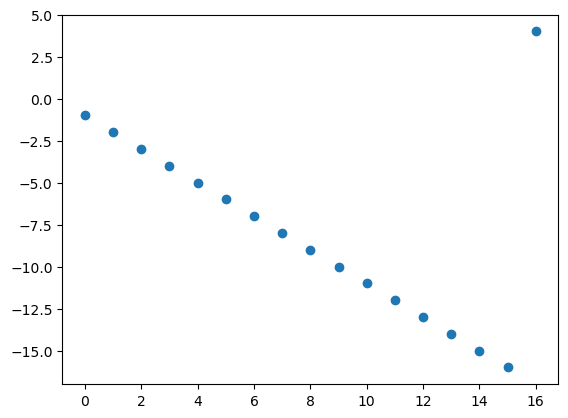

In [11]:
def watch_agent(env: gym.Env, max_steps: int, Q: np.array) -> None:
    """This is a visualising function for the environment."""
    state, _ = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
    rewards = []
    for step in range(max_steps):
        # Take the action (index) that have the maximum reward
        action = np.argmax(Q[state])
        new_state, reward, done1, done2, info = env.step(action)
        total_rewards_ep += reward
        rewards.append(total_rewards_ep)

        if done1 or done2:
            break
        state = new_state


new_env = gym.make("Taxi-v3", render_mode="human")
watch_agent(new_env, 200, resulting_agent.quality_matrix)
new_env.close()


## Deep Q Learning Method for Taxi Agent:

A deep learning model uses multiple layers of a neural network to extract the abstract data from an input.

In [ ]:
""" Have an agent class, with a policy. """
class RLAgent():
  def __init__(self) -> None:
    pass
  def policy(self):
    pass
  